<a href="https://colab.research.google.com/github/swetzel1/introduction_to_ml/blob/main/hw5/hw5_p2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd

import torch
from torch.autograd import Variable
torch.set_printoptions(edgeitems=2, linewidth=75)
import torch.optim as optim

import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import and preprocess housing dataset
#read data from csv file
file_path = '/content/drive/My Drive/Intro_to_ML/Datasets/Housing.csv'
df = pd.read_csv(file_path)

from IPython.display import display
display(df)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
#select required parameters
varlist =  ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

df = df[varlist]
df.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking'] # don't normalize output

df[num_vars] = scaler.fit_transform(df[num_vars])
df.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,1.046726,1.403419,1.421812,1.378217,1.517692
1,12250000,1.757010,1.403419,5.405809,2.532024,2.679409
2,12250000,2.218232,0.047278,1.421812,0.224410,1.517692
3,12215000,1.083624,1.403419,1.421812,0.224410,2.679409
4,11410000,1.046726,1.403419,-0.570187,0.224410,1.517692


In [ ]:
#shuffle and prepare split
n_samples = df.shape[0]
n_val = int(0.2 * n_samples) # 20/80 split

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]


#split training and validation set
y = df.pop('price')
y = y.to_numpy()
x = df.to_numpy()

#convert numpy to tensor
x_train = torch.tensor(x[train_indices], dtype=torch.float32)
y_train = torch.tensor(y[train_indices], dtype=torch.float32)
x_val = torch.tensor(x[val_indices], dtype=torch.float32)
y_val = torch.tensor(y[val_indices], dtype=torch.float32)



In [ ]:
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

In [ ]:
inputDim = 5        # dim of x
outputDim = 1       # dim of y
learningRate = 0.001 #learning rate for adam???
epochs = 5000

model = linearRegression(inputDim, outputDim)

In [ ]:
criterion = torch.nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)
#optimizer = torch.optim.Adam(model.parameters(), lr=learningRate)


In [ ]:
training_loss = []
validation_loss = []

for epoch in range(epochs):


    train_in = Variable(x_train)
    train_label = Variable(y_train)
    train_label = train_label.unsqueeze(1)

    val_in = Variable(x_val)
    val_label = Variable(y_val)
    val_label = val_label.unsqueeze(1)


    optimizer.zero_grad() #important

    train_pred = model(train_in)#predict

    loss = criterion(train_pred, train_label)#get train loss



    with torch.no_grad():
      val_pred = model(val_in)
      val_loss = criterion(val_pred, val_label)


    loss.backward()
    optimizer.step()


    training_loss.append(loss.item())#store loss
    validation_loss.append(val_loss.item())

    if epoch % 500 == 0: #report loss every 500 epochs
      print('Epoch %d, Loss %f' % (epoch, float(loss)))


Epoch 0, Loss 25829344018432.000000
Epoch 500, Loss 4587294556160.000000
Epoch 1000, Loss 1879664361472.000000
Epoch 1500, Loss 1516832161792.000000
Epoch 2000, Loss 1467497054208.000000
Epoch 2500, Loss 1460682489856.000000
Epoch 3000, Loss 1459711901696.000000
Epoch 3500, Loss 1459564707840.000000
Epoch 4000, Loss 1459539935232.000000
Epoch 4500, Loss 1459535085568.000000


In [ ]:
training_rmse = [np.sqrt(x) for x in training_loss]

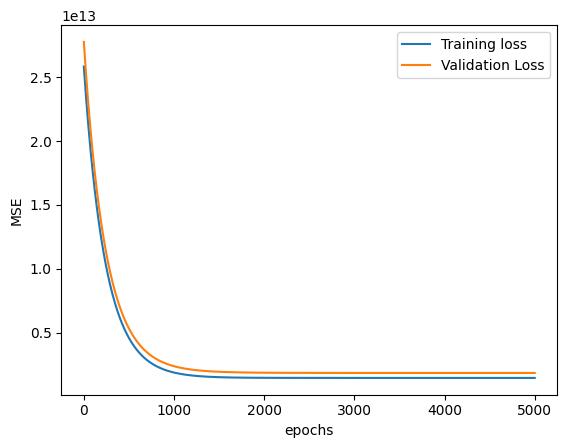

In [ ]:
plt.plot(training_loss, label="Training loss")
plt.plot(validation_loss, label="Validation Loss")

plt.xlabel("epochs")
plt.ylabel("MSE")
plt.legend()
plt.show()

In [ ]:
#plt.plot(training_rmse, label='Training loss - root mean square')
#plt.xlabel("epochs")
#plt.ylabel("RMSE")
#plt.legend()
#plt.show()